In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 12),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [3]:
def convert_ws_in_cols(ws):
    ws_0 = []
    ws_1 = []
    ws_2 = []
    for ws_e in ws:
        splitted = list(ws_e[1:-1].split(", "))
        ws_0.append(int(splitted[0]))
        ws_1.append(int(splitted[1]))
        if len(splitted) == 3:
            ws_2.append(int(splitted[2]))
        else:
            ws_2.append(0)
    return ws_0, ws_1, ws_2

In [4]:
def read_block_ws_huffman(net, clusters, unique, diff_acc, space, time, df):
    if net == "LeNet-MNIST-linkDM":
        net = ["LeNet-MNIST"]*len(clusters)
    else:
        net = [net]*len(clusters)
    ws_0, ws_1, ws_2 = convert_ws_in_cols(clusters)
    new_df_to_append = pd.DataFrame(list(zip(net, clusters, ws_0, ws_1, ws_2, unique, diff_acc, space, time)), columns =['net', 'ws', 'ws_0', 'ws_1', 'ws_2', 'unique', 'diff_acc', 'space', 'time'])
    df = pd.concat([df, new_df_to_append], ignore_index=True)
    return df

In [5]:
#IF YOU RUN ALL EXPERIMENTS ON YOUR MACHINE YOU HAVE TO: directory_res = "results/"
directory_res = "results_just_runned/"

# VGG19
## WS with HAM

In [6]:
file = open(directory_res+'huffman_ws.txt', 'r')

In [7]:
Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'ws', 'ws_0', 'ws_1', 'ws_2', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        net = line.split("/")[1]
    elif row % 6 == 0:
        df = read_block_ws_huffman(net, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
    else:
        exec(line)
df = read_block_ws_huffman(net, clusters, unique, diff_acc, space, time, df)

In [8]:
df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2'], ascending=True)

In [9]:
def get_accuracy_bar_plots(df, lim_acc, max_time, legend=False):
    ws_0_values = (2, 32, 128, 1024)
    metrics = ('diff_acc', 'time', 'space')
    nets = ('VGG19-MNIST', 'VGG19-CIFAR10')
    metrics_to_print = (r'$\Delta_{perf}$', 'time', r'$\psi$')

    rows = len(metrics)
    cols = len(ws_0_values)

    fig, axes = plt.subplots(rows, cols, figsize=(8, 12)) #2020
    fig.subplots_adjust(hspace=0.05, wspace=0)



    for r, metric in enumerate(metrics):
        for c, ws_0 in enumerate(ws_0_values):
            extract = df[(df.ws_0==ws_0)].loc[:, ['ws', metric, 'net']]
            mask = (extract.net == 'VGG19-MNIST')
            axes[r, c].bar(extract[mask].ws+"2", extract[mask][metric], color='#003f5c')
            mask = (extract.net == 'VGG19-CIFAR10')
            axes[r, c].bar(extract[mask].ws+"3", extract[mask][metric], color='#ffa600')

    if legend:
        axes[2,1].legend(nets, loc=1)

    for r in range(rows):
        for c in range(cols):
            plt.sca(axes[r][c])
            
            if r == 0:
                plt.ylim(lim_acc)
                plt.axhline(0, ls='-')
                
            if r == 1:
                plt.ylim(1, max_time)
                
            if r == 2:
                plt.ylim(0.,1.)
                plt.axhline(1, ls='-')
            
            if r == rows - 1:
                plt.xticks(range(4), (2, 32, 128, 1024))
                plt.tick_params(axis='x', which='major')
                plt.xticks([])
                plt.xlabel(ws_0_values[c])
            else:
                plt.xticks([])
            
            if c > 0:
                plt.yticks([])

            if c == cols - 1:
                axes[r][c].yaxis.set_label_position('right')
                plt.ylabel(metrics_to_print[r], fontsize=22)

In [10]:
max_time = 287 #df_sorted[(df_sorted.net=="VGG19-CIFAR10")].max()[8]

In [11]:
acc_lim = (-0.003, 0.003)

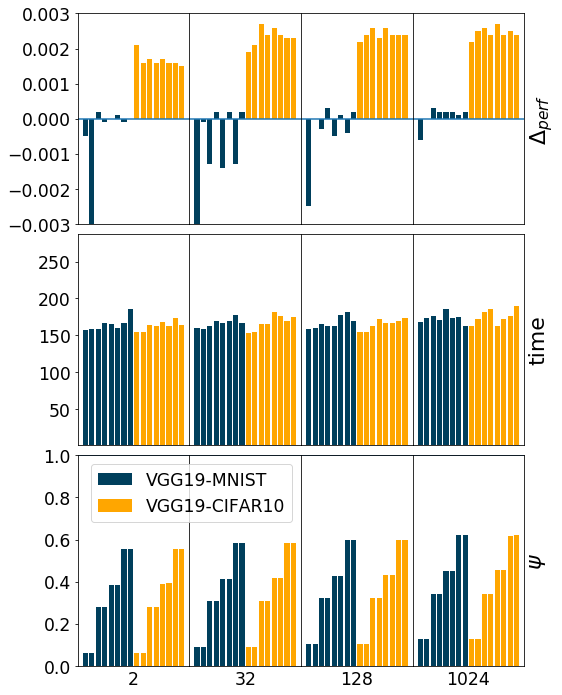

In [12]:
get_accuracy_bar_plots(df_sorted, acc_lim, max_time, True)
plt.savefig("plots_results/ws_huffman.png")

In [13]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-MNIST
(df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="VGG19-MNIST")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
91,VGG19-MNIST,"[128, 32, 32]",128,32,32,"[128, 32, 32]",0.0003,0.321,163


In [14]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-CIFAR10
(df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="VGG19-CIFAR10")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
74,VGG19-CIFAR10,"[32, 32, 2]",32,32,2,"[32, 32, 2]",0.0027,0.306,165


In [15]:
#BEST SPACE CONFIGURATION FOR VGG19-MNIST
df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="VGG19-MNIST")].sort_values(by=["space"], ascending=True)[:1]

,net,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
89,VGG19-MNIST,"[128, 2, 32]",128,2,32,"[128, 2, 32]",0.0,0.104,160


In [16]:
#BEST SPACE CONFIGURATION FOR VGG19-CIFAR10
df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="VGG19-CIFAR10")].sort_values(by=["space"], ascending=True)[1:2]

,net,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
65,VGG19-CIFAR10,"[2, 2, 32]",2,2,32,"[2, 2, 32]",0.0016,0.063,155


## PQ with HAM 

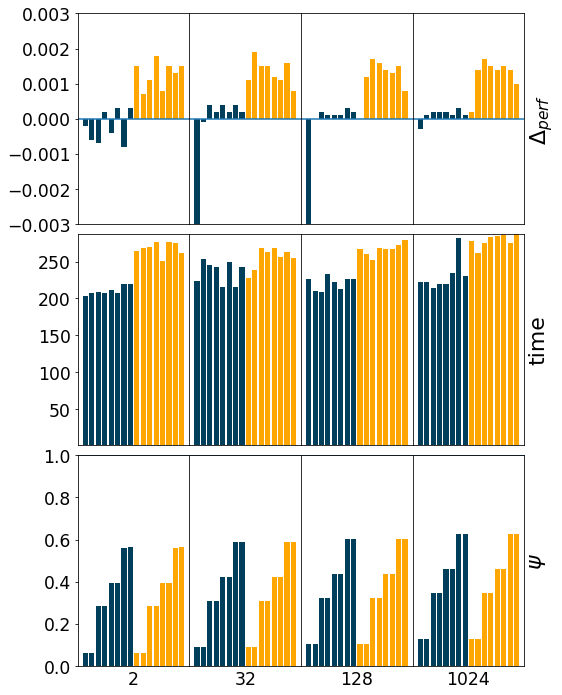

In [17]:
file = open(directory_res+'huffman_pq.txt', 'r')
Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'ws', 'ws_0', 'ws_1', 'ws_2', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        net = line.split("/")[1]
    elif row % 6 == 0:
        df = read_block_ws_huffman(net, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
    else:
        exec(line)
df = read_block_ws_huffman(net, clusters, unique, diff_acc, space, time, df)

df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2'], ascending=True)
acc_lim = (-0.003, 0.003)
get_accuracy_bar_plots(df_sorted, acc_lim, max_time)

plt.savefig("plots_results/pq_huffman.png")

In [18]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-MNIST
(df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="VGG19-MNIST")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
62,VGG19-MNIST,"[32, 32, 2]",32,32,2,"[32, 32, 2]",0.0004,0.309,245


In [19]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-CIFAR10
(df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="VGG19-CIFAR10")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
29,VGG19-CIFAR10,"[32, 2, 32]",32,2,32,"[32, 2, 32]",0.0019,0.091,239


In [20]:
#BEST SPACE CONFIGURATION FOR VGG19-MNIST
df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="VGG19-MNIST")].sort_values(by=["space"], ascending=True)[:1]

,net,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
45,VGG19-MNIST,"[128, 2, 32]",128,2,32,"[128, 2, 32]",-0.0,0.105,210


In [21]:
#BEST SPACE CONFIGURATION FOR VGG19-CIFAR10
df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="VGG19-CIFAR10")].sort_values(by=["space"], ascending=True)[1:2]

,net,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
21,VGG19-CIFAR10,"[2, 2, 32]",2,2,32,"[2, 2, 32]",0.0007,0.063,269


## Pr-WS with HAM

In [22]:
def read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df):
    if net == "LeNet-MNIST-linkDM":
        net = ["LeNet-MNIST"]*len(pruning)
    else:
        net = [net]*len(pruning)
    ws_0, ws_1, ws_2 = convert_ws_in_cols(clusters)
    new_df_to_append = pd.DataFrame(list(zip(net, pruning, clusters, ws_0, ws_1, ws_2, unique, diff_acc, space, time)), columns =['net', 'pruning', 'ws', 'ws_0', 'ws_1', 'ws_2', 'unique', 'diff_acc', 'space', 'time'])
    df = pd.concat([df, new_df_to_append], ignore_index=True)
    return df

In [23]:
file = open(directory_res+'huffman_pruningws.txt', 'r') 

In [24]:
Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'pruning', 'ws', 'ws_0', 'ws_1', 'ws_2', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        net = line.split("/")[1]
    elif row % 7 == 0:
        df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
    else:
        exec(line)
df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)

In [25]:
df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2'], ascending=True)

In [26]:
df_pr = pd.concat([df_sorted[(df_sorted.net=="VGG19-CIFAR10") & (df_sorted.pruning=='60')],
                   df_sorted[(df_sorted.net=="VGG19-MNIST") & (df_sorted.pruning=='96')]])
df_ws = pd.concat([(df_sorted[(df_sorted.net=='VGG19-MNIST') & (df_sorted.ws=='[128, 32, 32]')]),
                   (df_sorted[(df_sorted.net=='VGG19-CIFAR10') & (df_sorted.ws=='[32, 32, 2]')])])

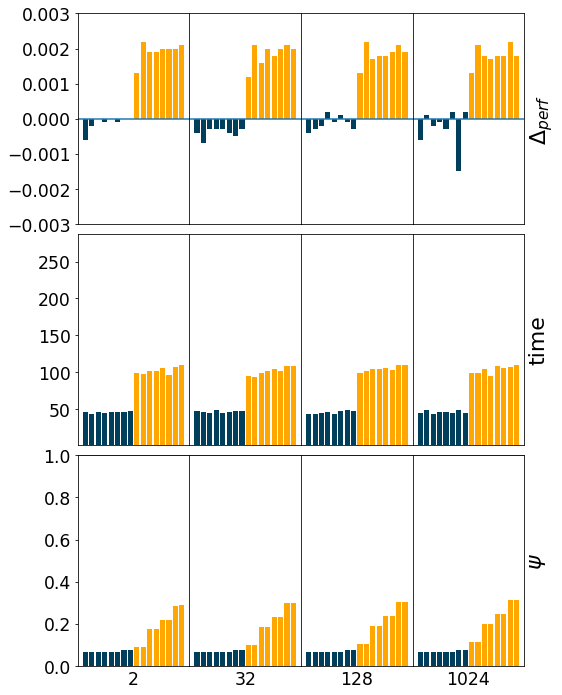

In [27]:
get_accuracy_bar_plots(df_pr, acc_lim, max_time)
plt.savefig("plots_results/prws_huffman_for_ws.png")

In [28]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-MNIST
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-MNIST")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
80,VGG19-MNIST,96,"[128, 32, 32]",128,32,32,"[6, 4, 3]",0.0002,0.067,46


In [29]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-CIFAR10
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-CIFAR10")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
116,VGG19-CIFAR10,60,"[128, 2, 32]",128,2,32,"[128, 3, 32]",0.0022,0.104,101


In [30]:
#BEST SPACE CONFIGURATION FOR VGG19-MNIST
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-MNIST")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
87,VGG19-MNIST,96,"[2, 32, 2]",2,32,2,"[3, 4, 3]",0.0,0.066,46


In [31]:
#BEST SPACE CONFIGURATION FOR VGG19-CIFAR10
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-CIFAR10")].sort_values(by=["space"], ascending=True)[1:2]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
124,VGG19-CIFAR10,60,"[2, 2, 32]",2,2,32,"[3, 3, 32]",0.0022,0.088,97


In [32]:
def get_accuracy_bar_plots_ws(df, acc_lim, max_time):
    pr_values = (30,40,50,60,70,80,90,95,96,97,98,99)
    pr_values_lab = ("30","","50","","70","","90","","96","","98","")

    metrics = ('diff_acc', 'time', 'space')
    nets = ('VGG19-MNIST', 'VGG19-CIFAR10')
    metrics_to_print = (r'$\Delta_{perf}$', 'time', r'$\psi$')

    colors = ('#003f5c', '#ffa600')
    
    rows = len(metrics)
    cols = len(nets)

    fig, axes = plt.subplots(rows, cols, figsize=(8, 12))
    fig.subplots_adjust(hspace=0.05, wspace=0)

    
    for r, metric in enumerate(metrics):
        for c, net in enumerate(nets):
            extract = df[(df.net==net)].loc[:, ['pruning', metric]]
            axes[r, c].bar(extract.pruning, extract[metric], color=colors[c])

    for r in range(rows):
        for c in range(cols):
            plt.sca(axes[r][c])
            if r == 0:
                plt.axhline(0, ls='-')
                plt.ylim(acc_lim)
                
            if r == 1:
                plt.ylim(1, max_time)
                
            if r == 2:
                plt.ylim(0.,1.)

            if r != rows - 1:
                plt.xticks([])
            else:
                plt.xticks(range(len(pr_values_lab)), pr_values_lab)
                
            if c > 0:
                plt.yticks([])
              
            if c == cols - 1:
                axes[r][c].yaxis.set_label_position('right')
                plt.ylabel(metrics_to_print[r], fontsize=22)

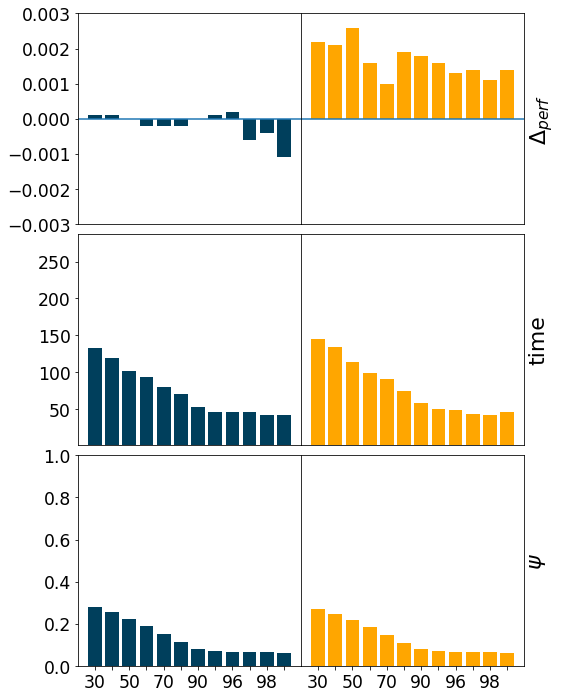

In [33]:
get_accuracy_bar_plots_ws(df_ws, acc_lim, max_time)
plt.savefig("plots_results/prws_huffman_for_pr.png")

In [34]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-MNIST
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-MNIST")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
80,VGG19-MNIST,96,"[128, 32, 32]",128,32,32,"[6, 4, 3]",0.0002,0.067,46


In [35]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-CIFAR10
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-CIFAR10")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
102,VGG19-CIFAR10,50,"[32, 32, 2]",32,32,2,"[32, 32, 3]",0.0026,0.216,114


In [36]:
#BEST SPACE CONFIGURATION FOR VGG19-MNIST
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-MNIST")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
80,VGG19-MNIST,96,"[128, 32, 32]",128,32,32,"[6, 4, 3]",0.0002,0.067,46


In [37]:
#BEST SPACE CONFIGURATION FOR VGG19-CIFAR10
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-CIFAR10")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
142,VGG19-CIFAR10,99,"[32, 32, 2]",32,32,2,"[3, 3, 3]",0.0014,0.063,45


## Pr-Ws with sHAM

In [38]:
file = open(directory_res+'sparse_huffman_pruningws.txt', 'r') 

In [39]:
Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'pruning', 'ws', 'ws_0', 'ws_1', 'ws_2', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        net = line.split("/")[1]
    elif row % 7 == 0:
        df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
    else:
        exec(line)
df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)

In [40]:
df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2'], ascending=True)

In [41]:
df_pr = pd.concat([df_sorted[(df_sorted.net=="VGG19-CIFAR10") & (df_sorted.pruning=='60')],
                  df_sorted[(df_sorted.net=="VGG19-MNIST") & (df_sorted.pruning=='96')]])
df_ws = pd.concat([(df_sorted[(df_sorted.net=='VGG19-MNIST') & (df_sorted.ws=='[128, 32, 32]')]),
                   (df_sorted[(df_sorted.net=='VGG19-CIFAR10') & (df_sorted.ws=='[32, 32, 2]')])])

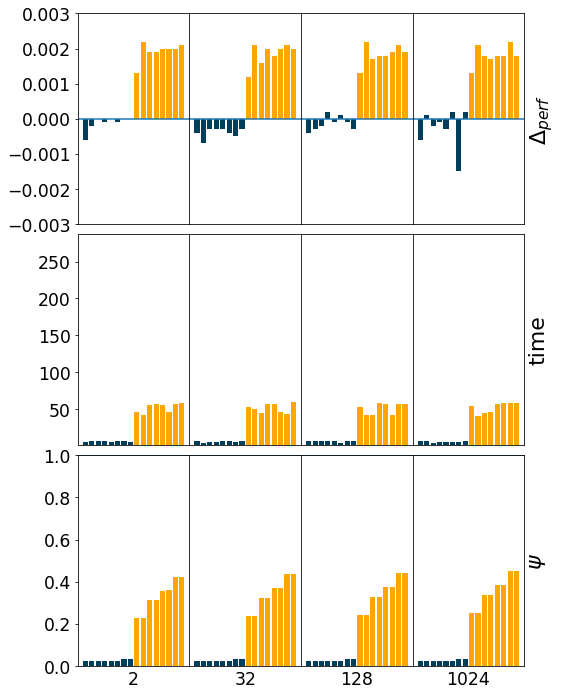

In [42]:
get_accuracy_bar_plots(df_pr, acc_lim, max_time)
plt.savefig("plots_results/prws_sparse_huffman_for_ws_only_data.png")

In [43]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-MNIST
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-MNIST")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
123,VGG19-MNIST,96,"[128, 32, 32]",128,32,32,"[6, 4, 3]",0.0002,0.024,6


In [44]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-CIFAR10
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-CIFAR10")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
73,VGG19-CIFAR10,60,"[128, 2, 32]",128,2,32,"[128, 3, 32]",0.0022,0.242,42


In [45]:
#BEST SPACE CONFIGURATION FOR VGG19-MNIST
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-MNIST")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
126,VGG19-MNIST,96,"[2, 128, 2]",2,128,2,"[3, 4, 3]",0.0,0.023,5


In [46]:
#BEST SPACE CONFIGURATION FOR VGG19-CIFAR10
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-CIFAR10")].sort_values(by=["space"], ascending=True)[1:2]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
81,VGG19-CIFAR10,60,"[2, 2, 32]",2,2,32,"[3, 3, 32]",0.0022,0.225,42


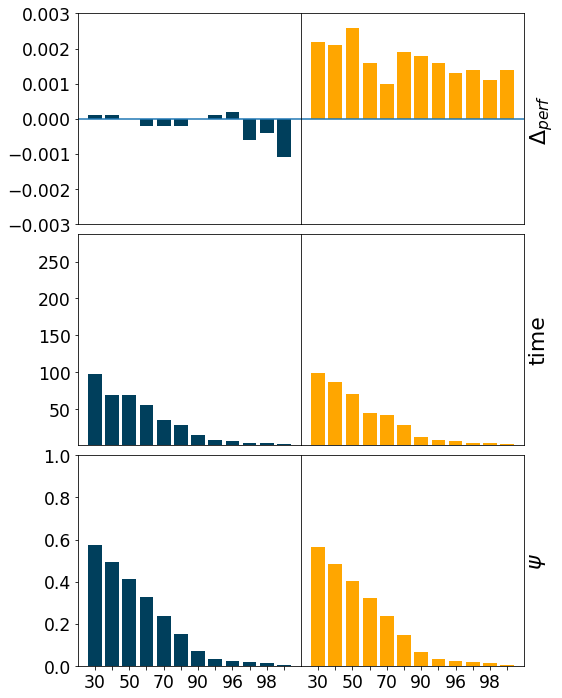

In [47]:
get_accuracy_bar_plots_ws(df_ws, acc_lim, max_time)
plt.savefig("plots_results/prws_sparse_huffman_for_pr_only_data.png")

In [48]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-MNIST
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-MNIST")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
123,VGG19-MNIST,96,"[128, 32, 32]",128,32,32,"[6, 4, 3]",0.0002,0.024,6


In [49]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-CIFAR10
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-CIFAR10")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
59,VGG19-CIFAR10,50,"[32, 32, 2]",32,32,2,"[32, 32, 3]",0.0026,0.404,70


In [50]:
#BEST SPACE CONFIGURATION FOR VGG19-MNIST
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-MNIST")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
123,VGG19-MNIST,96,"[128, 32, 32]",128,32,32,"[6, 4, 3]",0.0002,0.024,6


In [51]:
#BEST SPACE CONFIGURATION FOR VGG19-CIFAR10
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-CIFAR10")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
99,VGG19-CIFAR10,99,"[32, 32, 2]",32,32,2,"[3, 3, 3]",0.0014,0.006,2


## Pr-PQ with HAM

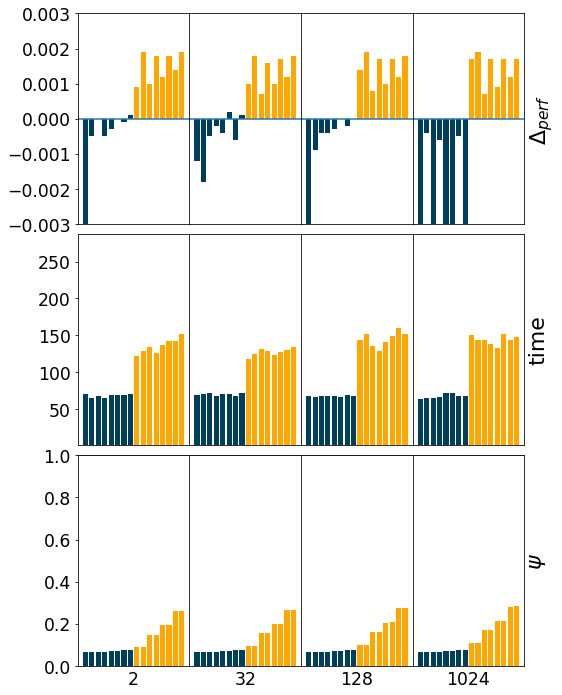

In [52]:
file = open(directory_res+'huffman_pruningpq.txt', 'r') 

Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'pruning', 'ws', 'ws_0', 'ws_1', 'ws_2', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        net = line.split("/")[1]
    elif row % 7 == 0:
        df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
    else:
        exec(line)
        
df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)

df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2'], ascending=True)

df_pr = pd.concat([df_sorted[(df_sorted.net=="VGG19-CIFAR10") & (df_sorted.pruning=='60')],
                   df_sorted[(df_sorted.net=="VGG19-MNIST") & (df_sorted.pruning=='96')]])

get_accuracy_bar_plots(df_pr, acc_lim, max_time)
plt.savefig("plots_results/huffman_pruningpqfixedp.png")

In [53]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-MNIST
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-MNIST")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
83,VGG19-MNIST,96,"[32, 128, 32]",32,128,32,"[4, 8, 4]",0.0002,0.068,70


In [54]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-CIFAR10
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-CIFAR10")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
33,VGG19-CIFAR10,60,"[2, 2, 32]",2,2,32,"[3, 3, 16]",0.0019,0.088,128


In [55]:
#BEST SPACE CONFIGURATION FOR VGG19-MNIST
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-MNIST")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
78,VGG19-MNIST,96,"[2, 32, 2]",2,32,2,"[3, 4, 3]",-0.0,0.066,67


In [56]:
#BEST SPACE CONFIGURATION FOR VGG19-CIFAR10
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-CIFAR10")].sort_values(by=["space"], ascending=True)[1:2]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
33,VGG19-CIFAR10,60,"[2, 2, 32]",2,2,32,"[3, 3, 16]",0.0019,0.088,128


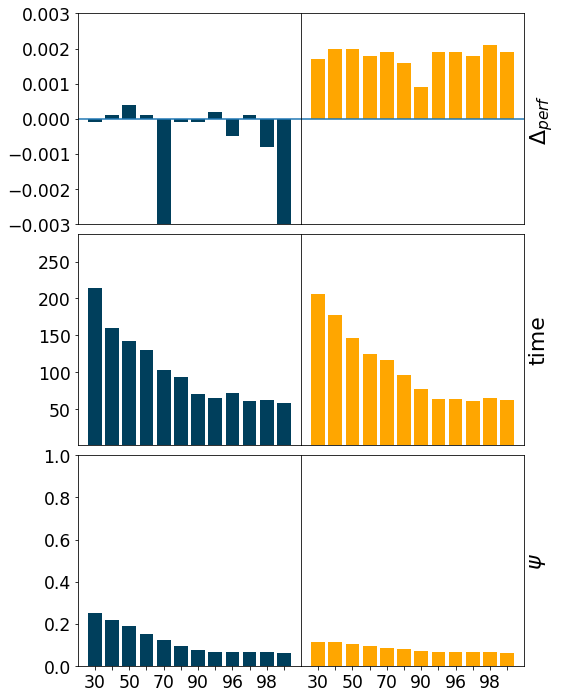

In [57]:
df_ws = pd.concat([(df_sorted[(df_sorted.net=='VGG19-MNIST') & (df_sorted.ws=='[32, 32, 2]')]),
                   (df_sorted[(df_sorted.net=='VGG19-CIFAR10') & (df_sorted.ws=='[32, 2, 32]')])])
get_accuracy_bar_plots_ws(df_ws, acc_lim, max_time)
plt.savefig("plots_results/huffman_pruningpqfixedpq.png")

In [58]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-MNIST
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-MNIST")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
46,VGG19-MNIST,50,"[32, 32, 2]",32,32,2,"[18, 19, 3]",0.0004,0.187,142


In [59]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-CIFAR10
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-CIFAR10")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
10,VGG19-CIFAR10,98,"[32, 2, 32]",32,2,32,"[4, 3, 4]",0.0021,0.064,65


In [60]:
#BEST SPACE CONFIGURATION FOR VGG19-MNIST
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-MNIST")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
53,VGG19-MNIST,97,"[32, 32, 2]",32,32,2,"[4, 4, 3]",0.0001,0.065,60


In [61]:
#BEST SPACE CONFIGURATION FOR VGG19-CIFAR10
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-CIFAR10")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
11,VGG19-CIFAR10,99,"[32, 2, 32]",32,2,32,"[4, 3, 4]",0.0019,0.063,62


## Pr-PQ with sHAM

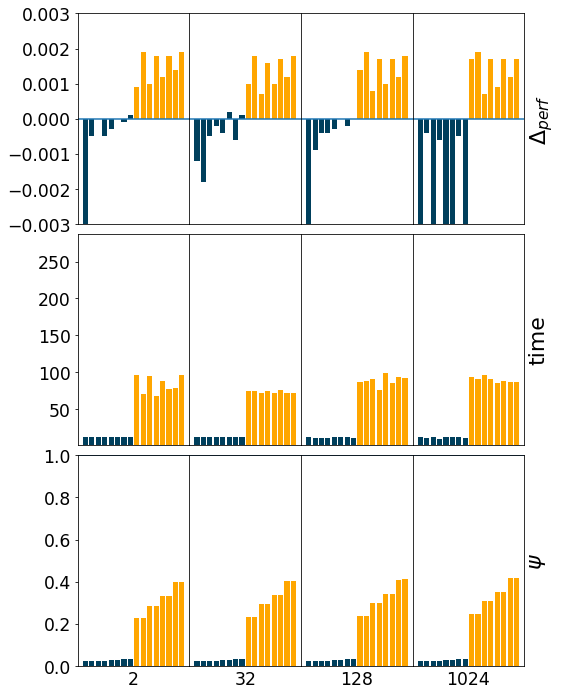

In [62]:
file = open(directory_res+'sparse_huffman_pruningpq.txt', 'r') 

Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'pruning', 'ws', 'ws_0', 'ws_1', 'ws_2', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        net = line.split("/")[1]
    elif row % 7 == 0:
        df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
    else:
        exec(line)
        
df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)

df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2'], ascending=True)

df_pr = pd.concat([df_sorted[(df_sorted.net=="VGG19-CIFAR10") & (df_sorted.pruning=='60')],
                   df_sorted[(df_sorted.net=="VGG19-MNIST") & (df_sorted.pruning=='96')]])

get_accuracy_bar_plots(df_pr, acc_lim, max_time)
plt.savefig("plots_results/sparse_huffman_pruningpqfixedp.png")

In [63]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-MNIST
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-MNIST")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
83,VGG19-MNIST,96,"[32, 128, 32]",32,128,32,"[4, 8, 4]",0.0002,0.026,11


In [64]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-CIFAR10
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-CIFAR10")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
33,VGG19-CIFAR10,60,"[2, 2, 32]",2,2,32,"[3, 3, 16]",0.0019,0.225,70


In [65]:
#BEST SPACE CONFIGURATION FOR VGG19-MNIST
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-MNIST")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
78,VGG19-MNIST,96,"[2, 32, 2]",2,32,2,"[3, 4, 3]",-0.0,0.023,11


In [66]:
#BEST SPACE CONFIGURATION FOR VGG19-CIFAR10
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="VGG19-CIFAR10")].sort_values(by=["space"], ascending=True)[1:2]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
33,VGG19-CIFAR10,60,"[2, 2, 32]",2,2,32,"[3, 3, 16]",0.0019,0.225,70


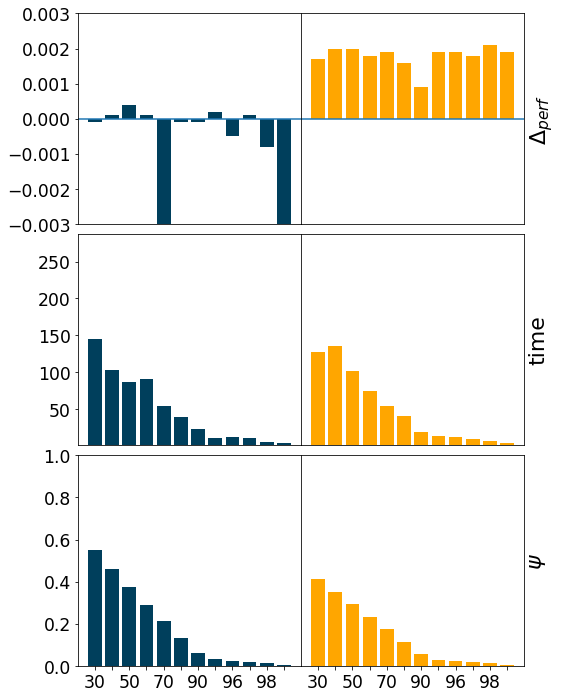

In [67]:
df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2'], ascending=True)

df_ws = pd.concat([(df_sorted[(df_sorted.net=='VGG19-MNIST') & (df_sorted.ws=='[32, 32, 2]')]),
                   (df_sorted[(df_sorted.net=='VGG19-CIFAR10') & (df_sorted.ws=='[32, 2, 32]')])])

get_accuracy_bar_plots_ws(df_ws, acc_lim, max_time)
plt.savefig("plots_results/sparse_huffman_pruningpqfixedpq.png")

In [68]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-MNIST
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-MNIST")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
46,VGG19-MNIST,50,"[32, 32, 2]",32,32,2,"[18, 19, 3]",0.0004,0.374,87


In [69]:
#BEST PERFORMANCE CONFIGURATION FOR VGG19-CIFAR10
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-CIFAR10")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
10,VGG19-CIFAR10,98,"[32, 2, 32]",32,2,32,"[4, 3, 4]",0.0021,0.012,6


In [70]:
#BEST SPACE CONFIGURATION FOR VGG19-MNIST
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-MNIST")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
53,VGG19-MNIST,97,"[32, 32, 2]",32,32,2,"[4, 4, 3]",0.0001,0.018,10


In [71]:
#BEST SPACE CONFIGURATION FOR VGG19-CIFAR10
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="VGG19-CIFAR10")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,unique,diff_acc,space,time
11,VGG19-CIFAR10,99,"[32, 2, 32]",32,2,32,"[4, 3, 4]",0.0019,0.006,3


# DeepDTA
## WS with HAM

In [72]:
def convert_ws_in_cols(ws):
    ws_0 = []
    ws_1 = []
    ws_2 = []
    ws_3 = []
    for ws_e in ws:
        splitted = list(ws_e[1:-1].split(", "))
        ws_0.append(int(splitted[0]))
        ws_1.append(int(splitted[1]))
        ws_2.append(int(splitted[2]))
        ws_3.append(int(splitted[3]))
        
        
    return ws_0, ws_1, ws_2, ws_3

In [73]:
def read_block_ws_huffman(net, clusters, unique, diff_acc, space, time, df):

    net = [net]*len(clusters)
    ws_0, ws_1, ws_2, ws_3 = convert_ws_in_cols(clusters)
    new_df_to_append = pd.DataFrame(list(zip(net, clusters, ws_0, ws_1, ws_2, ws_3, unique, diff_acc, space, time)), columns =['net', 'ws', 'ws_0', 'ws_1', 'ws_2', 'ws_3', 'unique', 'diff_acc', 'space', 'time'])
    df = pd.concat([df, new_df_to_append], ignore_index=True)
    return df

In [74]:
file = open(directory_res+'huffman_ws_deep.txt', 'r') 

In [75]:
Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'ws', 'ws_0', 'ws_1', 'ws_2', 'ws_3', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        print(line.split("/")[1])
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    elif row % 6 == 0:
        df = read_block_ws_huffman(net, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    else:
        exec(line)
df = read_block_ws_huffman(net, clusters, unique, diff_acc, space, time, df)

DeepDTA


In [76]:
df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2', 'ws_3'], ascending=True)
df_sorted["diff_acc"] = -1 * df_sorted["diff_acc"]
df_sorted = df_sorted[df_sorted.ws_3 != 128]

In [77]:
max_time = df_sorted.max()[9]

In [78]:
def get_accuracy_bar_plots(df, lim_acc, max_time, legend=False):
    ws_0_values = (2, 32, 128)
    metrics = ('diff_acc', 'time', 'space')
    metrics_to_print = (r'$\Delta_{perf}$', 'time', r'$\psi$')

    nets = ('DeepDTA-KIBA', 'DeepDTA-DAVIS')

    rows = len(metrics)
    cols = len(ws_0_values)

    fig, axes = plt.subplots(rows, cols, figsize=(11, 13)) #2020
    fig.subplots_adjust(hspace=0.05, wspace=0)



    for r, metric in enumerate(metrics):
        for c, ws_0 in enumerate(ws_0_values):
            extract = df[(df.ws_0==ws_0)].loc[:, ['ws', metric, 'net']]
            mask = (extract.net == 'DeepDTA-KIBA')
            axes[r, c].bar(extract[mask].ws, extract[mask][metric], color='#7a5195')
            mask = (extract.net == 'DeepDTA-DAVIS')
            axes[r, c].bar(extract[mask].ws+"1", extract[mask][metric], color='#ef5675')

    if legend:
        axes[2,1].legend(nets)
        
    for r in range(rows):
        for c in range(cols):
            plt.sca(axes[r][c])
            
            if r == 0:
                plt.ylim(lim_acc)
                plt.axhline(0, ls='-')
                
            if r == 1:
                plt.ylim(1, max_time)
                
            if r == 2:
                plt.ylim(0.,1.)
                plt.axhline(1, ls='-')
            
            if r == rows - 1:
                plt.xticks(range(4), (2, 32, 128, 1024))
                plt.tick_params(axis='x', which='major')
                plt.xticks([])
                plt.xlabel(ws_0_values[c])
            else:
                plt.xticks([])
            
            if c > 0:
                plt.yticks([])
              
            if c == cols - 1:
                axes[r][c].yaxis.set_label_position('right')
                plt.ylabel(metrics_to_print[r], fontsize=22)

In [79]:
acc_lim = (-0.03, 0.091)

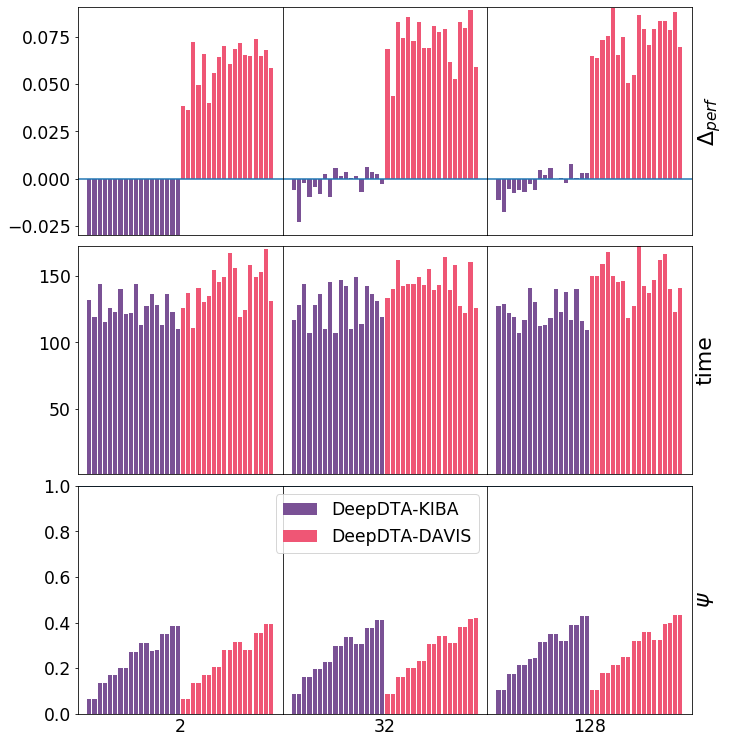

In [80]:
get_accuracy_bar_plots(df_sorted, acc_lim, max_time, True)
plt.savefig("plots_results/ws_huffman_deep.png")

In [81]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-KIBA
(df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
85,DeepDTA-KIBA,"[128, 128, 32, 2]",128,128,32,2,"[128, 128, 32, 2]",0.00771,0.39,117


In [82]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-DAVIS
(df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="DeepDTA-DAVIS")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
10,DeepDTA-DAVIS,"[128, 2, 128, 2]",128,2,128,2,"[128, 2, 128, 2]",0.09033,0.213,150


In [83]:
#BEST SPACE CONFIGURATION FOR DeepDTA-KIBA
df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="DeepDTA-KIBA")].sort_values(by=["space"], ascending=True)[:1]

,net,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
131,DeepDTA-KIBA,"[32, 32, 2, 2]",32,32,2,2,"[32, 32, 2, 2]",0.00259,0.228,110


In [84]:
#BEST SPACE CONFIGURATION FOR DeepDTA-DAVIS
df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="DeepDTA-DAVIS")].sort_values(by=["space"], ascending=True)[:1]

,net,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
40,DeepDTA-DAVIS,"[2, 2, 2, 2]",2,2,2,2,"[2, 2, 2, 2]",0.03826,0.063,126


## PQ with HAM

In [85]:
file = open(directory_res+'huffman_pq_deep.txt', 'r') 

In [86]:
Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'ws', 'ws_0', 'ws_1', 'ws_2', 'ws_3', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        print(line.split("/")[1])
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    elif row % 6 == 0:
        df = read_block_ws_huffman(net, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    else:
        exec(line)
df = read_block_ws_huffman(net, clusters, unique, diff_acc, space, time, df)

DeepDTA


In [87]:
df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2', 'ws_3'], ascending=True)
df_sorted["diff_acc"] = -1 * df_sorted["diff_acc"]
df_sorted = df_sorted[df_sorted.ws_3 != 128]

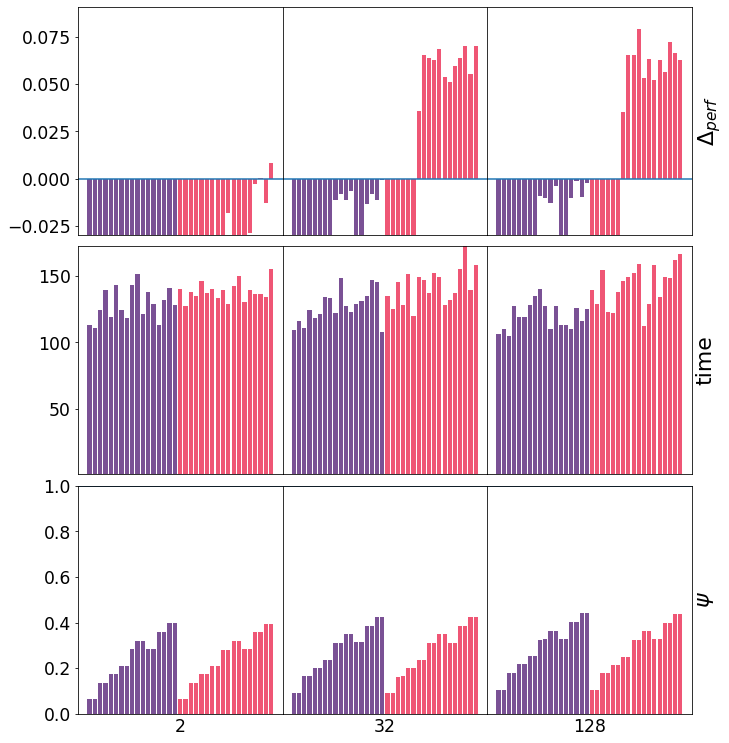

In [88]:
get_accuracy_bar_plots(df_sorted, acc_lim, max_time)
plt.savefig("plots_results/pq_huffman_deep.png")

In [89]:
df_sorted.head()

,net,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
80,DeepDTA-DAVIS,"[2, 2, 2, 2]",2,2,2,2,"[2, 2, 2, 2]",-0.47926,0.063,140
81,DeepDTA-DAVIS,"[2, 2, 2, 32]",2,2,2,32,"[2, 2, 2, 32]",-1.17434,0.063,127
82,DeepDTA-DAVIS,"[2, 2, 32, 2]",2,2,32,2,"[2, 2, 32, 2]",-0.05391,0.136,138
83,DeepDTA-DAVIS,"[2, 2, 32, 32]",2,2,32,32,"[2, 2, 32, 32]",-0.47929,0.136,135
78,DeepDTA-DAVIS,"[2, 2, 128, 2]",2,2,128,2,"[2, 2, 128, 2]",-0.47961,0.174,146


In [90]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-KIBA
(df_sorted[(df_sorted.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
37,DeepDTA-KIBA,"[32, 128, 128, 32]",32,128,128,32,"[32, 128, 128, 32]",-0.00052,0.425,108


In [91]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-DAVIS
(df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="DeepDTA-DAVIS")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
71,DeepDTA-DAVIS,"[128, 32, 32, 32]",128,32,32,32,"[128, 32, 32, 32]",0.07924,0.324,159


In [92]:
#BEST SPACE CONFIGURATION FOR DeepDTA-KIBA
(df_sorted[(df_sorted.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
37,DeepDTA-KIBA,"[32, 128, 128, 32]",32,128,128,32,"[32, 128, 128, 32]",-0.00052,0.425,108


In [93]:
#BEST SPACE CONFIGURATION FOR DeepDTA-DAVIS
df_sorted[(df_sorted.diff_acc>=0) & (df_sorted.net=="DeepDTA-DAVIS")].sort_values(by=["space"], ascending=True)[:1]

,net,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
104,DeepDTA-DAVIS,"[32, 32, 2, 2]",32,32,2,2,"[32, 32, 2, 2]",0.03591,0.237,149


## Pr-WS with HAM

In [94]:
def read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df):
    net = [net]*len(pruning)
    ws_0, ws_1, ws_2, ws_3 = convert_ws_in_cols(clusters)
    new_df_to_append = pd.DataFrame(list(zip(net, pruning, clusters, ws_0, ws_1, ws_2, ws_3, unique, diff_acc, space, time)), columns =['net', 'pruning', 'ws', 'ws_0', 'ws_1', 'ws_2', 'ws_3', 'unique', 'diff_acc', 'space', 'time'])
    df = pd.concat([df, new_df_to_append], ignore_index=True)
    return df

In [95]:
file = open(directory_res+'huffman_pruningws_deep.txt', 'r') 

In [96]:
Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'pruning', 'ws', 'ws_0', 'ws_1', 'ws_2', 'ws_3', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    elif row % 7 == 0:
        df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    else:
        exec(line)
df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)

In [97]:
df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2', 'ws_3'], ascending=True)
df_sorted["diff_acc"] = -1 * df_sorted["diff_acc"]
df_sorted = df_sorted[df_sorted.ws_3 != 128]

In [98]:
def get_accuracy_bar_plots_ws(df, acc_lim, max_time):
    pr_values = (30,40,50,60,70,80,90,95,96,97,98,99)
    pr_values_lab = ("30","","50","","70","","90","","96","","98","")

    metrics = ('diff_acc', 'time', 'space')
    nets = ('DeepDTA-KIBA', 'DeepDTA-DAVIS')
    metrics_to_print = (r'$\Delta_{perf}$', 'time', r'$\psi$')

    colors = ('#7a5195', '#ef5675')
    
    rows = len(metrics)
    cols = len(nets)

    fig, axes = plt.subplots(rows, cols, figsize=(8, 12)) #2020
    fig.subplots_adjust(hspace=0.05, wspace=0)


    for r, metric in enumerate(metrics):
        for c, net in enumerate(nets):
            extract = df[(df.net==net)].loc[:, ['pruning', metric]]
            axes[r, c].bar(extract.pruning, extract[metric], color=colors[c])


    for r in range(rows):
        for c in range(cols):
            plt.sca(axes[r][c])
            if r == 0:
                plt.axhline(0, ls='-')
                plt.ylim(acc_lim)
                
            if r == 1:
                plt.ylim(1, max_time)
                
            if r == 2:
                plt.ylim(0.,1.)

            if r != rows - 1:
                plt.xticks([])
            else:
                plt.xticks(range(len(pr_values_lab)), pr_values_lab)

            
            if c > 0:
                plt.yticks([])
              

            if c == cols - 1:
                axes[r][c].yaxis.set_label_position('right')
                plt.ylabel(metrics_to_print[r], fontsize=22)

In [99]:
df_pr = pd.concat([df_sorted[(df_sorted.net=="DeepDTA-KIBA") & (df_sorted.pruning=='60')],
                   df_sorted[(df_sorted.net=="DeepDTA-DAVIS") & (df_sorted.pruning=='80')]])
df_ws = pd.concat([df_sorted[(df_sorted.net=="DeepDTA-KIBA") & (df_sorted.ws=='[128, 128, 32, 2]')],
                   df_sorted[(df_sorted.net=="DeepDTA-DAVIS") & (df_sorted.ws=='[128, 2, 128, 2]')]])

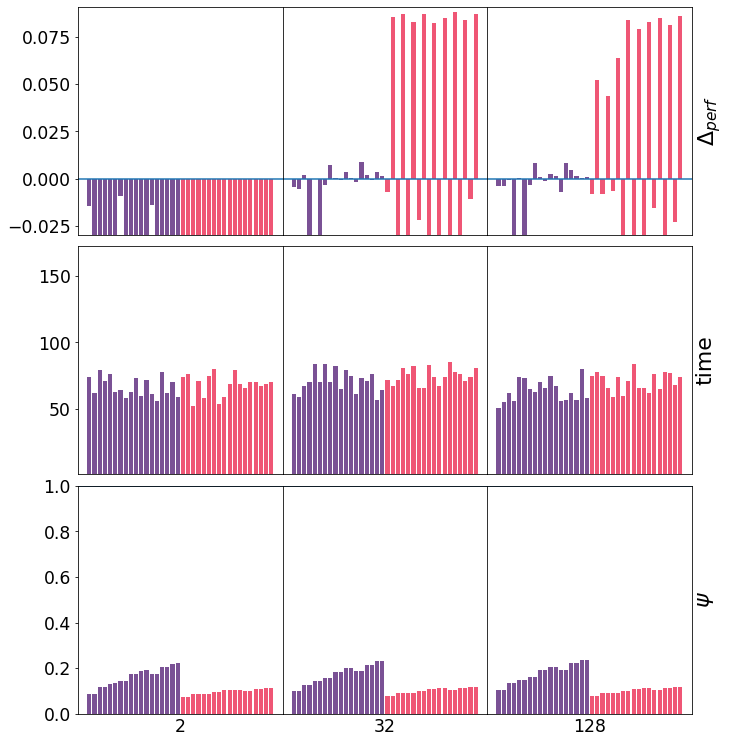

In [100]:
get_accuracy_bar_plots(df_pr, acc_lim, max_time)
plt.savefig("plots_results/pws_huffman_deep_fixed_pr.png")

In [101]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-KIBA
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
107,DeepDTA-KIBA,60,"[32, 128, 2, 32]",32,128,2,32,"[32, 128, 3, 32]",0.00893,0.187,73


In [102]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-DAVIS
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-DAVIS")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
44,DeepDTA-DAVIS,80,"[32, 128, 2, 32]",32,128,2,32,"[19, 30, 3, 11]",0.08817,0.105,78


In [103]:
#BEST SPACE CONFIGURATION FOR DeepDTA-KIBA
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-KIBA")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
114,DeepDTA-KIBA,60,"[32, 2, 32, 2]",32,2,32,2,"[32, 3, 32, 3]",0.00167,0.127,67


In [104]:
#BEST SPACE CONFIGURATION FOR DeepDTA-DAVIS
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-DAVIS")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
50,DeepDTA-DAVIS,80,"[32, 2, 2, 32]",32,2,2,32,"[19, 3, 3, 11]",0.08556,0.079,67


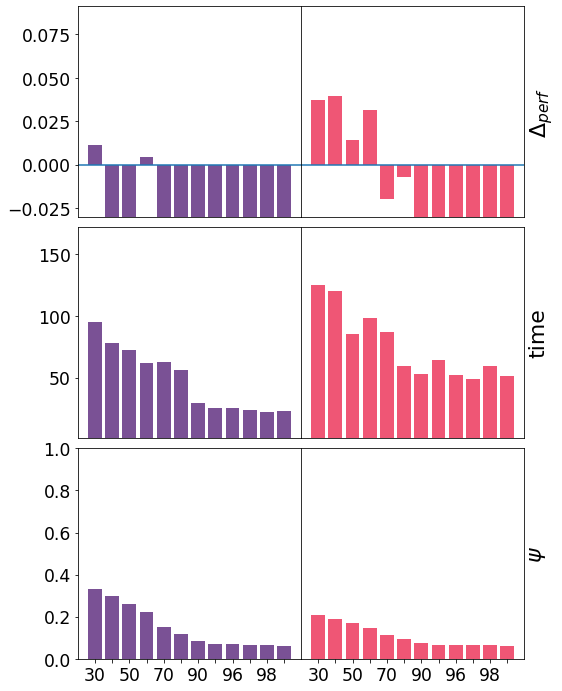

In [105]:
get_accuracy_bar_plots_ws(df_ws, acc_lim, max_time)
plt.savefig("plots_results/pws_huffman_deep_fixed_ws.png")

In [106]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-KIBA
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
65,DeepDTA-KIBA,30,"[128, 128, 32, 2]",128,128,32,2,"[128, 128, 32, 3]",0.01118,0.33,95


In [107]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-DAVIS
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-DAVIS")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
1,DeepDTA-DAVIS,40,"[128, 2, 128, 2]",128,2,128,2,"[128, 3, 128, 3]",0.03969,0.191,120


In [108]:
#BEST SPACE CONFIGURATION FOR DeepDTA-KIBA
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-KIBA")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
72,DeepDTA-KIBA,60,"[128, 128, 32, 2]",128,128,32,2,"[128, 128, 32, 3]",0.00433,0.222,62


In [109]:
#BEST SPACE CONFIGURATION FOR DeepDTA-DAVIS
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-DAVIS")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
3,DeepDTA-DAVIS,60,"[128, 2, 128, 2]",128,2,128,2,"[128, 3, 128, 3]",0.0317,0.148,98


## Pr-WS with sHAM

In [110]:
file = open(directory_res+'sparse_huffman_pruningws_deep.txt', 'r') 

In [111]:
Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'pruning', 'ws', 'ws_0', 'ws_1', 'ws_2', 'ws_3', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    elif row % 7 == 0:
        df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    else:
        exec(line)
df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)

In [112]:
df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2', 'ws_3'], ascending=True)
df_sorted["diff_acc"] = -1 * df_sorted["diff_acc"]
df_sorted = df_sorted[df_sorted.ws_3 != 128]

In [113]:
df_pr = pd.concat([df_sorted[(df_sorted.net=="DeepDTA-KIBA") & (df_sorted.pruning=='60')],
                   df_sorted[(df_sorted.net=="DeepDTA-DAVIS") & (df_sorted.pruning=='80')]])
df_ws = pd.concat([df_sorted[(df_sorted.net=="DeepDTA-KIBA") & (df_sorted.ws=='[128, 128, 32, 2]')],
                   df_sorted[(df_sorted.net=="DeepDTA-DAVIS") & (df_sorted.ws=='[128, 2, 128, 2]')]])

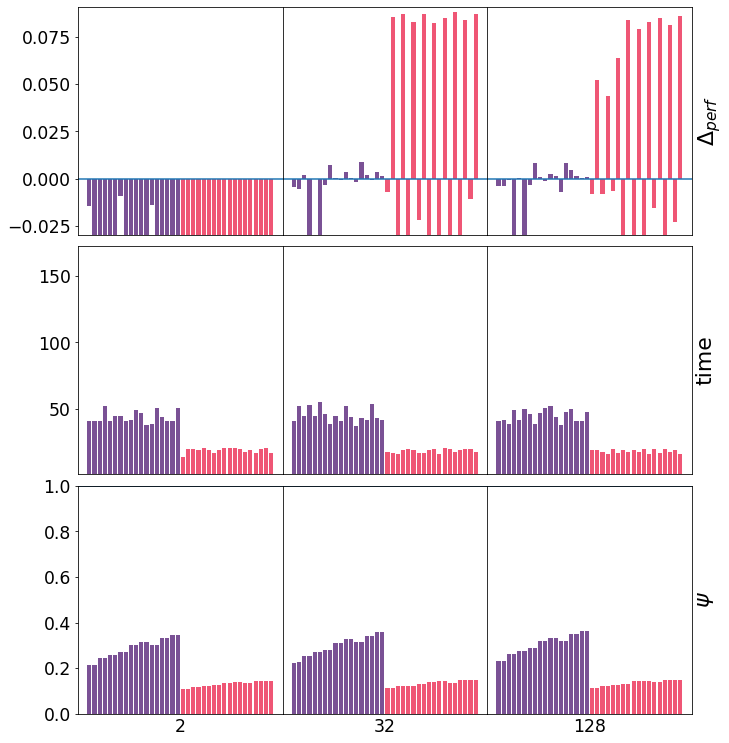

In [114]:
get_accuracy_bar_plots(df_pr, acc_lim, max_time)
plt.savefig("plots_results/pws_sparse_huffman_deep_fixed_pr.png")

In [115]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-KIBA
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
107,DeepDTA-KIBA,60,"[32, 128, 2, 32]",32,128,2,32,"[32, 128, 3, 32]",0.00893,0.314,43


In [116]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-DAVIS
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-DAVIS")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
44,DeepDTA-DAVIS,80,"[32, 128, 2, 32]",32,128,2,32,"[19, 30, 3, 11]",0.08817,0.137,18


In [117]:
#BEST SPACE CONFIGURATION FOR DeepDTA-KIBA
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-KIBA")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
114,DeepDTA-KIBA,60,"[32, 2, 32, 2]",32,2,32,2,"[32, 3, 32, 3]",0.00167,0.254,45


In [118]:
#BEST SPACE CONFIGURATION FOR DeepDTA-DAVIS
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-DAVIS")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
50,DeepDTA-DAVIS,80,"[32, 2, 2, 32]",32,2,2,32,"[19, 3, 3, 11]",0.08556,0.112,17


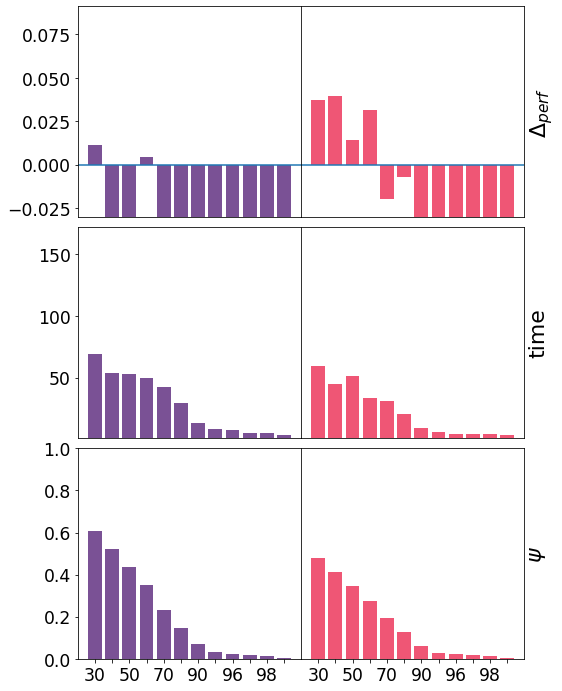

In [119]:
get_accuracy_bar_plots_ws(df_ws, acc_lim, max_time)
plt.savefig("plots_results/pws_sparse_huffman_deep_fixed_ws.png")

In [120]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-KIBA
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
65,DeepDTA-KIBA,30,"[128, 128, 32, 2]",128,128,32,2,"[128, 128, 32, 3]",0.01118,0.605,69


In [121]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-DAVIS
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-DAVIS")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
1,DeepDTA-DAVIS,40,"[128, 2, 128, 2]",128,2,128,2,"[128, 3, 128, 3]",0.03969,0.413,45


In [122]:
#BEST SPACE CONFIGURATION FOR DeepDTA-KIBA
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-KIBA")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
72,DeepDTA-KIBA,60,"[128, 128, 32, 2]",128,128,32,2,"[128, 128, 32, 3]",0.00433,0.349,50


In [123]:
#BEST SPACE CONFIGURATION FOR DeepDTA-DAVIS
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-DAVIS")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
3,DeepDTA-DAVIS,60,"[128, 2, 128, 2]",128,2,128,2,"[128, 3, 128, 3]",0.0317,0.275,33


## Pr-PQ with HAM

In [124]:
file = open(directory_res+'huffman_pruningpq_deep.txt', 'r') 

In [125]:
Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'pruning', 'ws', 'ws_0', 'ws_1', 'ws_2', 'ws_3', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    elif row % 7 == 0:
        df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    else:
        exec(line)
df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)

In [126]:
df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2', 'ws_3'], ascending=True)
df_sorted["diff_acc"] = -1 * df_sorted["diff_acc"]
df_sorted = df_sorted[df_sorted.ws_3 != 128]

In [127]:
df_pr = pd.concat([df_sorted[(df_sorted.net=="DeepDTA-KIBA") & (df_sorted.pruning=='60')],
                   df_sorted[(df_sorted.net=="DeepDTA-DAVIS") & (df_sorted.pruning=='80')]])
df_ws = pd.concat([df_sorted[(df_sorted.net=="DeepDTA-KIBA") & (df_sorted.ws=='[32, 128, 128, 32]')],
                   df_sorted[(df_sorted.net=="DeepDTA-DAVIS") & (df_sorted.ws=='[128, 32, 32, 32]')]])

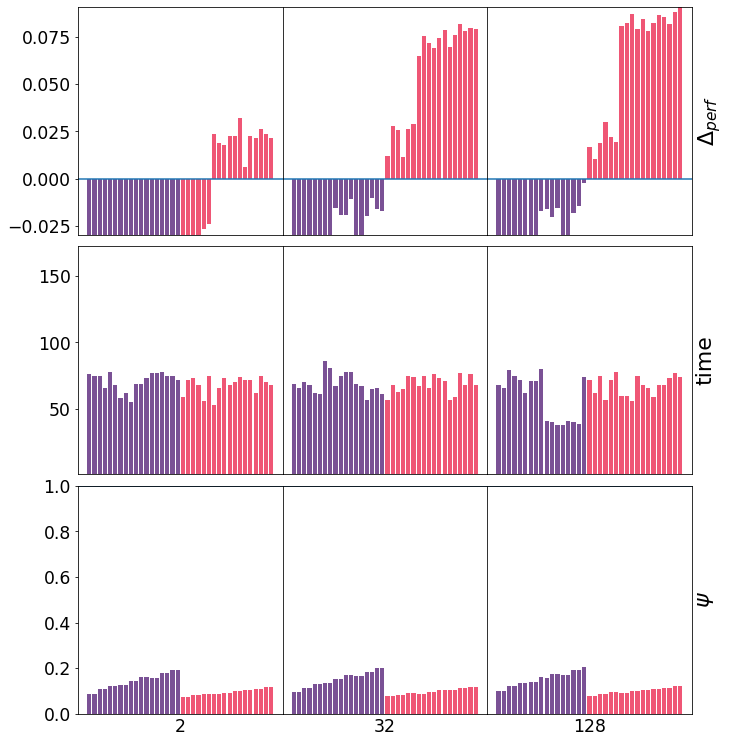

In [128]:
get_accuracy_bar_plots(df_pr, acc_lim, max_time)
plt.savefig("plots_results/ppq_huffman_deep_fixed_pr.png")

In [129]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-KIBA
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time


In [130]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-DAVIS
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-DAVIS")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
1,DeepDTA-DAVIS,80,"[128, 128, 128, 32]",128,128,128,32,"[29, 29, 28, 8]",0.09206,0.122,74


In [131]:
#BEST SPACE CONFIGURATION FOR DeepDTA-KIBA
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-KIBA")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time


In [132]:
#BEST SPACE CONFIGURATION FOR DeepDTA-DAVIS
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-DAVIS")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
44,DeepDTA-DAVIS,80,"[32, 2, 2, 2]",32,2,2,2,"[9, 3, 3, 3]",0.01195,0.077,57


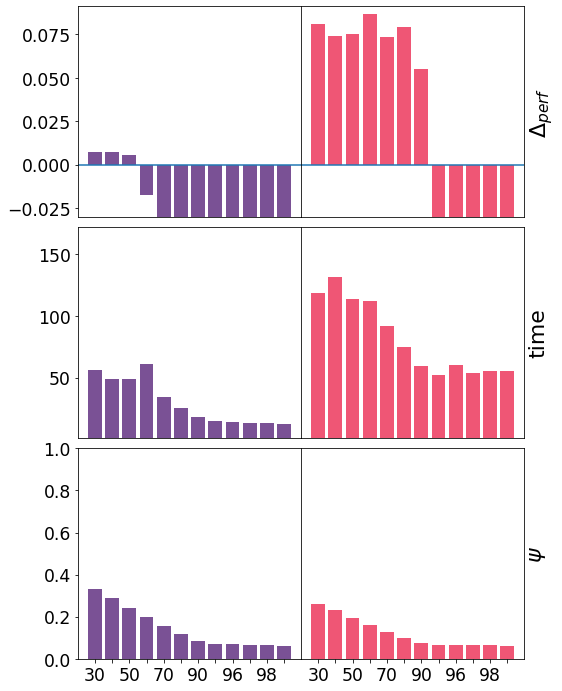

In [133]:
df_ws = df_ws.sort_values(by=["pruning"])
get_accuracy_bar_plots_ws(df_ws, acc_lim, max_time)
plt.savefig("plots_results/ppq_huffman_deep_fixed_ws.png")

In [134]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-KIBA
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
66,DeepDTA-KIBA,40,"[32, 128, 128, 32]",32,128,128,32,"[22, 79, 79, 22]",0.00724,0.291,49


In [135]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-DAVIS
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-DAVIS")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
57,DeepDTA-DAVIS,60,"[128, 32, 32, 32]",128,32,32,32,"[54, 16, 15, 15]",0.08694,0.16,112


In [136]:
#BEST SPACE CONFIGURATION FOR DeepDTA-KIBA
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-KIBA")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
67,DeepDTA-KIBA,50,"[32, 128, 128, 32]",32,128,128,32,"[19, 67, 66, 19]",0.00538,0.243,49


In [137]:
#BEST SPACE CONFIGURATION FOR DeepDTA-DAVIS
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-DAVIS")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
59,DeepDTA-DAVIS,90,"[128, 32, 32, 32]",128,32,32,32,"[16, 7, 6, 6]",0.05515,0.075,59


## Pr-PQ with sHAM

In [138]:
file = open(directory_res+'sparse_huffman_pruningpq_deep.txt', 'r') 

In [139]:
Lines = file.readlines() 
df = pd.DataFrame(columns =['net', 'pruning', 'ws', 'ws_0', 'ws_1', 'ws_2', 'ws_3', 'unique', 'diff_acc', 'space', 'time'])
for row, line in enumerate(Lines):
    if row == 0:
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    elif row % 7 == 0:
        df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)
        net = line.split("/")[1]
        net += "-"+line.split("/")[2]
    else:
        exec(line)
df = read_block_pr_ws_huffman(net, pruning, clusters, unique, diff_acc, space, time, df)

In [140]:
df_sorted = df.sort_values(by=['net', 'ws_0', 'ws_1', 'ws_2', 'ws_3'], ascending=True)
df_sorted["diff_acc"] = -1 * df_sorted["diff_acc"]
df_sorted = df_sorted[df_sorted.ws_3 != 128]

In [141]:
df_pr = pd.concat([df_sorted[(df_sorted.net=="DeepDTA-KIBA") & (df_sorted.pruning=='60')],
                   df_sorted[(df_sorted.net=="DeepDTA-DAVIS") & (df_sorted.pruning=='80')]])
df_ws = pd.concat([df_sorted[(df_sorted.net=="DeepDTA-KIBA") & (df_sorted.ws=='[32, 128, 128, 32]')],
                   df_sorted[(df_sorted.net=="DeepDTA-DAVIS") & (df_sorted.ws=='[128, 32, 32, 32]')]])

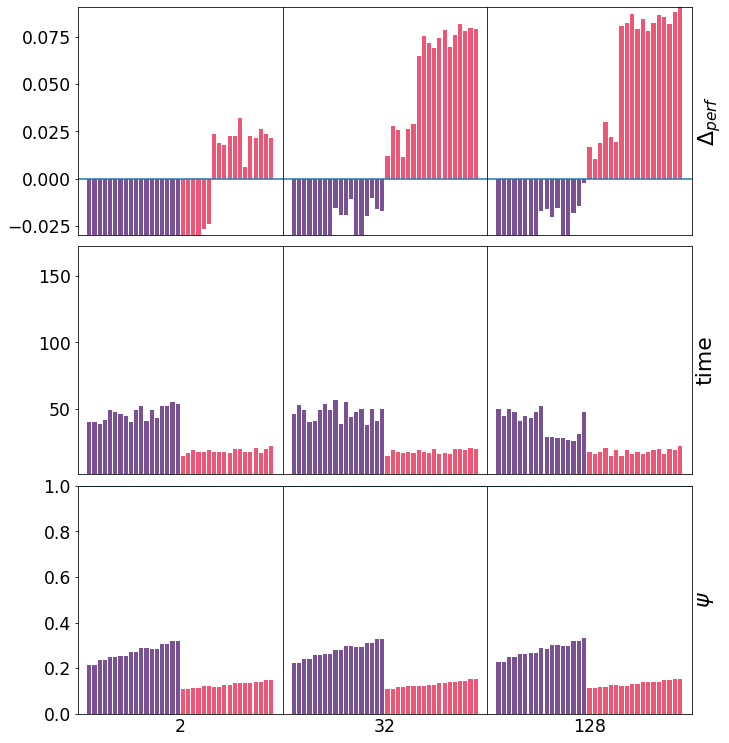

In [142]:
get_accuracy_bar_plots(df_pr, acc_lim, max_time)
plt.savefig("plots_results/ppq_sparse_huffman_deep_fixed_pr.png")

In [143]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-KIBA
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time


In [144]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-DAVIS
(df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-DAVIS")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
1,DeepDTA-DAVIS,80,"[128, 128, 128, 32]",128,128,128,32,"[29, 29, 28, 8]",0.09206,0.154,22


In [145]:
#BEST SPACE CONFIGURATION FOR DeepDTA-KIBA
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-KIBA")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time


In [146]:
#BEST SPACE CONFIGURATION FOR DeepDTA-DAVIS
df_pr[(df_pr.diff_acc>=0) & (df_pr.net=="DeepDTA-DAVIS")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
44,DeepDTA-DAVIS,80,"[32, 2, 2, 2]",32,2,2,2,"[9, 3, 3, 3]",0.01195,0.11,15


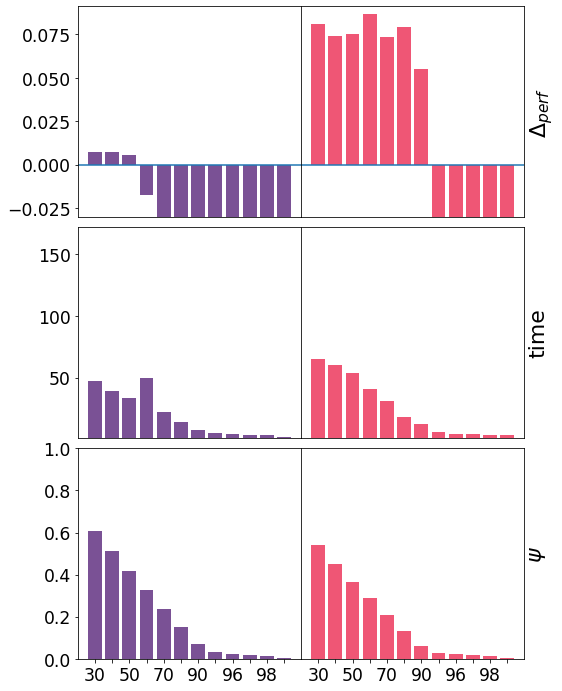

In [147]:
df_ws = df_ws.sort_values(by=["pruning"])
get_accuracy_bar_plots_ws(df_ws, acc_lim, max_time)
plt.savefig("plots_results/ppq_sparse_huffman_deep_fixed_ws.png")

In [148]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-KIBA
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-KIBA")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
66,DeepDTA-KIBA,40,"[32, 128, 128, 32]",32,128,128,32,"[22, 79, 79, 22]",0.00724,0.512,39


In [149]:
#BEST PERFORMANCE CONFIGURATION FOR DeepDTA-DAVIS
(df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-DAVIS")].sort_values(by=["diff_acc"], ascending=False)[:1])

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
57,DeepDTA-DAVIS,60,"[128, 32, 32, 32]",128,32,32,32,"[54, 16, 15, 15]",0.08694,0.287,41


In [150]:
#BEST SPACE CONFIGURATION FOR DeepDTA-KIBA
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-KIBA")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
67,DeepDTA-KIBA,50,"[32, 128, 128, 32]",32,128,128,32,"[19, 67, 66, 19]",0.00538,0.418,33


In [151]:
#BEST SPACE CONFIGURATION FOR DeepDTA-DAVIS
df_ws[(df_ws.diff_acc>=0) & (df_ws.net=="DeepDTA-DAVIS")].sort_values(by=["space"], ascending=True)[:1]

,net,pruning,ws,ws_0,ws_1,ws_2,ws_3,unique,diff_acc,space,time
59,DeepDTA-DAVIS,90,"[128, 32, 32, 32]",128,32,32,32,"[16, 7, 6, 6]",0.05515,0.06,12
